<img src="img/python-logo-notext.svg"
     style="display:block;margin:auto;width:10%"/>
<h1 style="text-align:center;">Python: Zeitreihen 2</h1>
<h2 style="text-align:center;">Coding Akademie München GmbH</h2>
<br/>
<div style="text-align:center;">Dr. Matthias Hölzl</div>
<div style="text-align:center;">Allaithy Raed</div>

# Zeitreihen mit Statsmodels

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)

In [4]:
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959      1.0  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959      2.0  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959      3.0  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959      4.0  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960      1.0  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

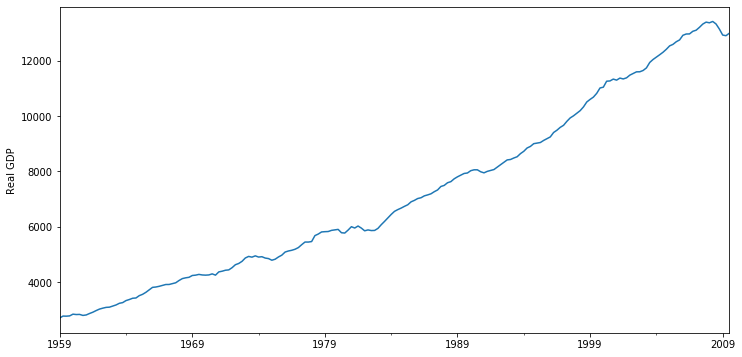

In [5]:
ax = df['realgdp'].plot(figsize=(12, 6))
ax.autoscale(axis='x', tight=True)
ax.set(ylabel="Real GDP");

Mittels eines Hodrick-Prescott-Filters kann eine Zeitreihe in Trend- und Zyklische Komponente unterteilt werden.

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [7]:
gdp_cycle.plot(figsize=(12, 4))

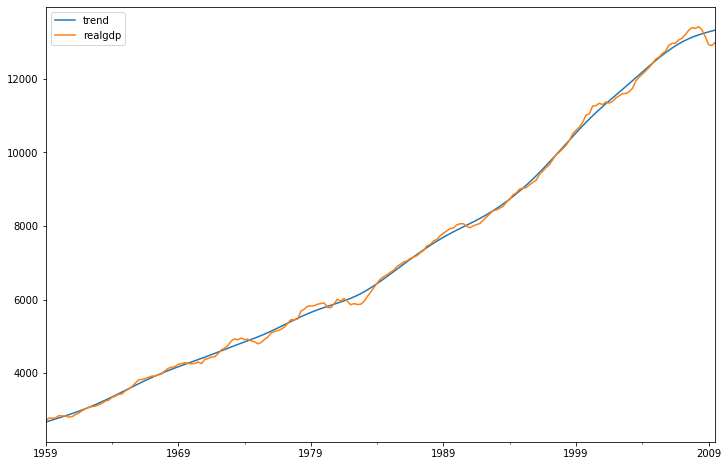

In [8]:
df['trend'] = gdp_trend
df[['trend', 'realgdp']].plot(figsize=(12, 8))

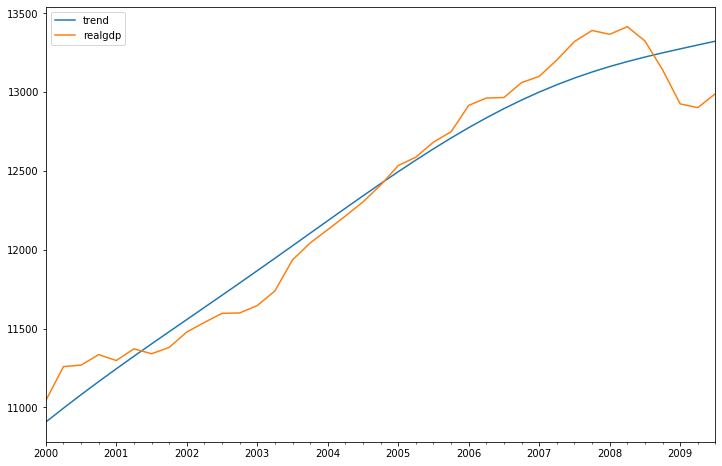

In [9]:
df[['trend', 'realgdp']]['2000-01-01':].plot(figsize=(12, 8));

## ETS-Dekomposition

Zerlegung in Error, Trend, Seasonality

In [10]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [11]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [12]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

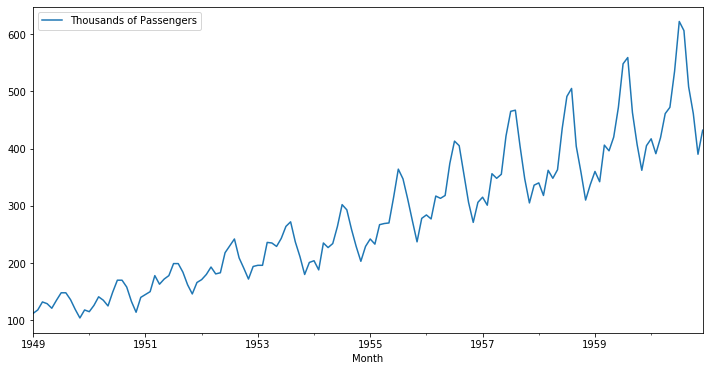

In [13]:
airline.plot(figsize=(12, 6));

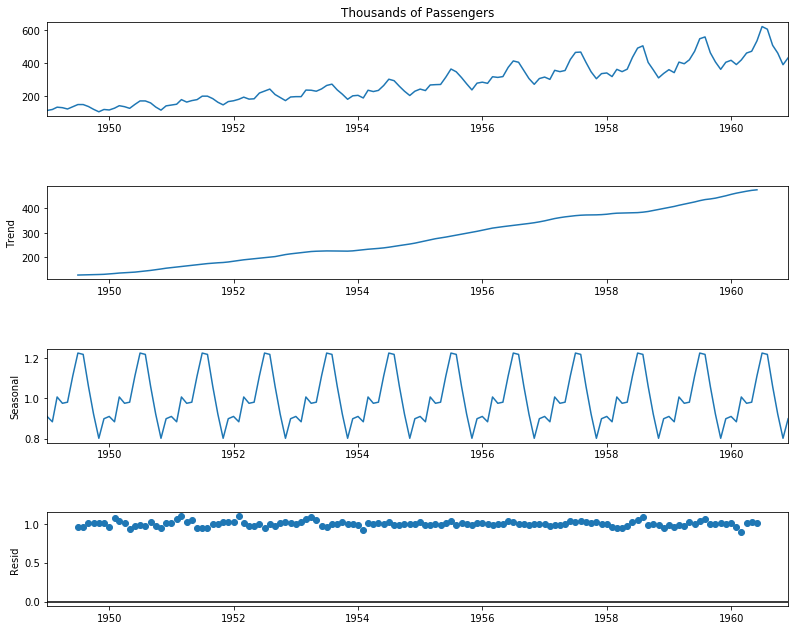

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decomposition = seasonal_decompose(airline['Thousands of Passengers'],
                                            model='multiplicative')
fig = seasonal_decomposition.plot();
fig.set_size_inches(12, 10);

## SMA: Simple Moving Average

In [15]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [16]:
airline.head(15)

Thousands of Passengers  6-month-SMA  12-month-SMA
Month                                                         
1949-01-01                      112          NaN           NaN
1949-02-01                      118          NaN           NaN
1949-03-01                      132          NaN           NaN
1949-04-01                      129          NaN           NaN
1949-05-01                      121          NaN           NaN
1949-06-01                      135   124.500000           NaN
1949-07-01                      148   130.500000           NaN
1949-08-01                      148   135.500000           NaN
1949-09-01                      136   136.166667           NaN
1949-10-01                      119   134.500000           NaN
1949-11-01                      104   131.666667           NaN
1949-12-01                      118   128.833333    126.666667
1950-01-01                      115   123.333333    126.916667
1950-02-01                      126   119.666667    127.583333
1950-03-01                      141   120.500000    128.333333

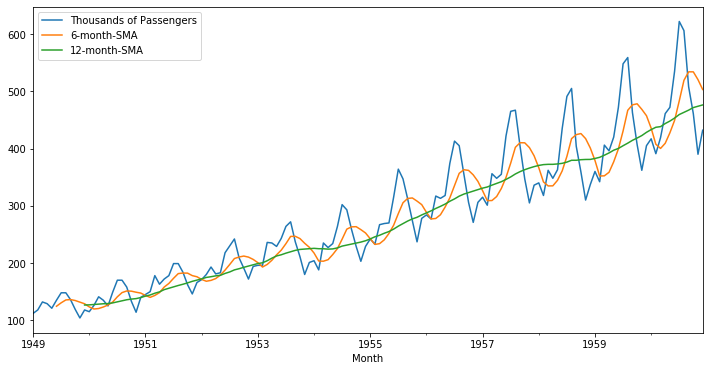

In [17]:
airline.plot(figsize=(12,6));

## EWMA: Exponentially Weighted Moving Average

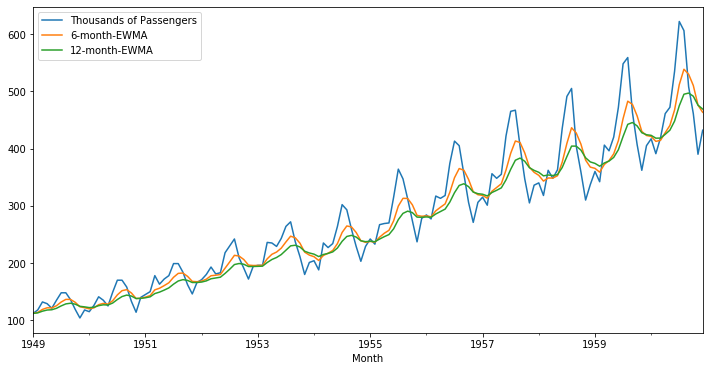

In [18]:
airline['6-month-EWMA'] = airline['Thousands of Passengers'].ewm(span=6, adjust=False).mean()
airline['12-month-EWMA'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()
airline[['Thousands of Passengers', '6-month-EWMA', '12-month-EWMA']].plot(figsize=(12, 6));

## Holt-Winters Methoden

Um die Holt-Winters Methoden anwenden zu können muss der Index des Data Frames eine Frequenz haben:

In [19]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [20]:
airline.index.freq = 'MS' # Month Start

### Simple Exponential Smoothing

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings
warnings.filterwarnings('ignore')

In [38]:
span = 12
alpha = 2 / (span + 1)

In [39]:
ses = SimpleExpSmoothing(airline['Thousands of Passengers'])
fitted_ses = ses.fit(smoothing_level=alpha, optimized=False)
airline['12-month-SES'] = fitted_ses.fittedvalues.shift(-1)

In [40]:
airline.head()

Thousands of Passengers  6-month-SMA  12-month-SMA  6-month-EWMA  \
Month                                                                          
1949-01-01                      112          NaN           NaN    112.000000   
1949-02-01                      118          NaN           NaN    113.714286   
1949-03-01                      132          NaN           NaN    118.938776   
1949-04-01                      129          NaN           NaN    121.813411   
1949-05-01                      121          NaN           NaN    121.581008   

            12-month-EWMA  12-month-SES  12-month-ES  12-month-TES  \
Month                                                                
1949-01-01     112.000000    112.000000   114.237772    113.081288   
1949-02-01     112.923077    112.923077   120.237772    120.550753   
1949-03-01     115.857988    115.857988   134.237772    135.527339   
1949-04-01     117.879836    117.879836   131.237772    133.155076   
1949-05-01     118.359861    118.359861   123.237772    125.656129   

            12-month-TES-add  12-month-TES-mul  
Month                                           
1949-01-01        113.081288        111.608110  
1949-02-01        120.550753        118.853687  
1949-03-01        135.527339        133.343675  
1949-04-01        133.155076        127.912641  
1949-05-01        125.656129        120.991626

### Double Exponential Smoothing

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add')
fitted_es = es.fit()
airline['12-month-ES'] = fitted_es.fittedvalues.shift(-1)

In [42]:
airline.head()

Thousands of Passengers  6-month-SMA  12-month-SMA  6-month-EWMA  \
Month                                                                          
1949-01-01                      112          NaN           NaN    112.000000   
1949-02-01                      118          NaN           NaN    113.714286   
1949-03-01                      132          NaN           NaN    118.938776   
1949-04-01                      129          NaN           NaN    121.813411   
1949-05-01                      121          NaN           NaN    121.581008   

            12-month-EWMA  12-month-SES  12-month-ES  12-month-TES  \
Month                                                                
1949-01-01     112.000000    112.000000   114.237772    113.081288   
1949-02-01     112.923077    112.923077   120.237772    120.550753   
1949-03-01     115.857988    115.857988   134.237772    135.527339   
1949-04-01     117.879836    117.879836   131.237772    133.155076   
1949-05-01     118.359861    118.359861   123.237772    125.656129   

            12-month-TES-add  12-month-TES-mul  
Month                                           
1949-01-01        113.081288        111.608110  
1949-02-01        120.550753        118.853687  
1949-03-01        135.527339        133.343675  
1949-04-01        133.155076        127.912641  
1949-05-01        125.656129        120.991626

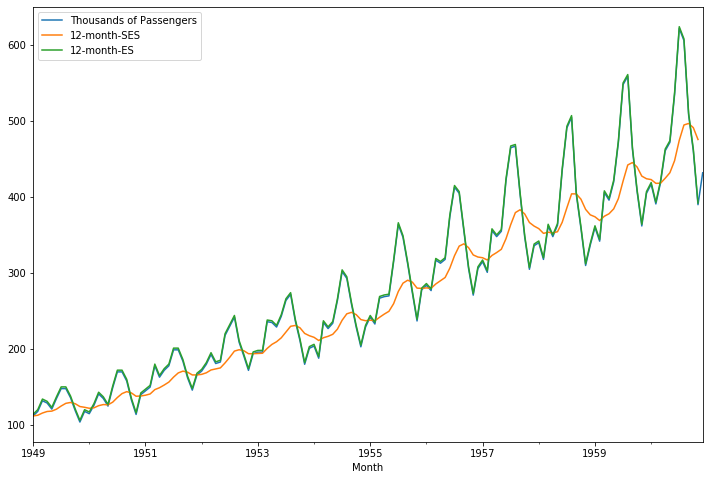

In [43]:
airline[['Thousands of Passengers', '12-month-SES', '12-month-ES']].plot(figsize=(12,8));

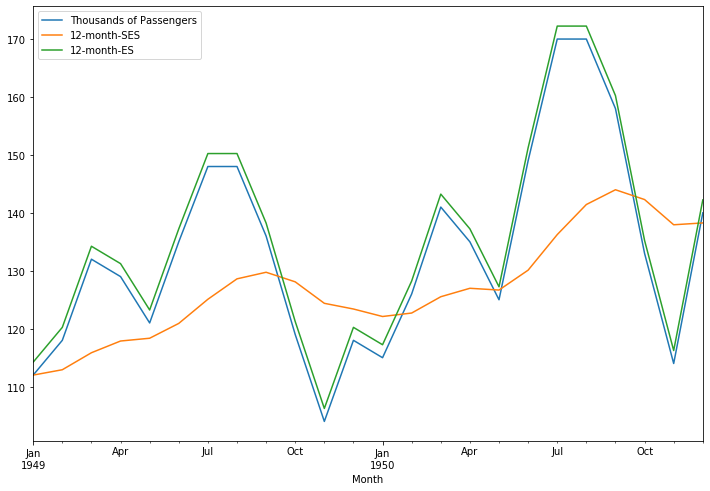

In [44]:
last_years = airline[['Thousands of Passengers', '12-month-SES', '12-month-ES']].iloc[:24]
last_years.plot(figsize=(12,8));

### Triple Exponential Smoothing

In [45]:
tes_add = ExponentialSmoothing(airline['Thousands of Passengers'],
                               trend='add', 
                               seasonal='add', seasonal_periods=12)
fitted_tes_add = tes_add.fit()
airline['12-month-TES-add'] = fitted_tes_add.fittedvalues

In [46]:
airline.head()

Thousands of Passengers  6-month-SMA  12-month-SMA  6-month-EWMA  \
Month                                                                          
1949-01-01                      112          NaN           NaN    112.000000   
1949-02-01                      118          NaN           NaN    113.714286   
1949-03-01                      132          NaN           NaN    118.938776   
1949-04-01                      129          NaN           NaN    121.813411   
1949-05-01                      121          NaN           NaN    121.581008   

            12-month-EWMA  12-month-SES  12-month-ES  12-month-TES  \
Month                                                                
1949-01-01     112.000000    112.000000   114.237772    113.081288   
1949-02-01     112.923077    112.923077   120.237772    120.550753   
1949-03-01     115.857988    115.857988   134.237772    135.527339   
1949-04-01     117.879836    117.879836   131.237772    133.155076   
1949-05-01     118.359861    118.359861   123.237772    125.656129   

            12-month-TES-add  12-month-TES-mul  
Month                                           
1949-01-01        113.081288        111.608110  
1949-02-01        120.550753        118.853687  
1949-03-01        135.527339        133.343675  
1949-04-01        133.155076        127.912641  
1949-05-01        125.656129        120.991626

In [47]:
tes_mul = ExponentialSmoothing(airline['Thousands of Passengers'],
                               trend='mul', 
                               seasonal='mul', seasonal_periods=12)
fitted_tes_mul = tes_mul.fit()
airline['12-month-TES-mul'] = fitted_tes_mul.fittedvalues

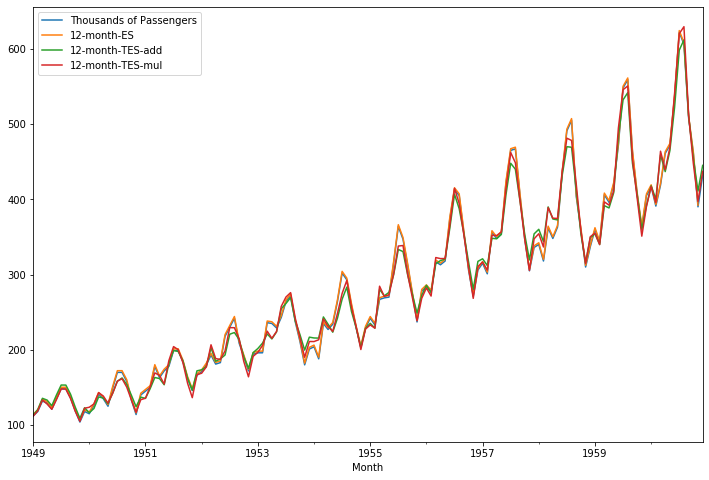

In [48]:
airline[['Thousands of Passengers',
         '12-month-ES',
         '12-month-TES-add',
         '12-month-TES-mul']].plot(figsize=(12,8));

In [49]:
last_years = airline[['Thousands of Passengers',
         '12-month-ES',
         '12-month-TES-add',
         '12-month-TES-mul']].iloc[:24]
last_years.plot(figsize=(12,8));